In this experiment I plot the results for the first time contact of the boxes and the time for the boxes to become flush


Note: The "Maximum" time in this experiment is 10 minutes. So if both boxes become stuck on a wall, or if 10 minutes pass, they are recorded as 600 seconds. Flush is defined as 2 edges of the boxes being flush against eachother. In the case of the '1' and '5' inch group, the boxes were always flush against each other along their longer dimension. For the case of '9' it was more common for the boxes to be flush with 1 long dimension and one short dimension forming an "L". 

In [174]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "../../figures/box_experiment.png")

In [156]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [157]:
DATA_DIR = '../../data/'
FIGURE_DIR = '../../figures/'

In [158]:
#Import the data
first_touch = pd.read_csv(DATA_DIR + 'first_touch.csv')
flush = pd.read_csv(DATA_DIR + 'flush.csv')
first_touch = first_touch.dropna()
flush = flush.dropna()

In [159]:
flush

,1,5,9
0,39.0,50.0,470.0
1,14.0,77.0,96.0
2,4.0,72.0,600.0
3,17.0,101.0,600.0
4,17.0,163.0,109.0
5,21.0,71.0,139.0
6,11.0,89.0,600.0
7,2.0,166.0,600.0
8,29.0,62.0,600.0
9,1.0,92.0,600.0


In [160]:
first_touch

,1,5,9
0,9.0,25.0,188.0
1,10.0,33.0,94.0
2,3.0,48.0,600.0
3,8.0,43.0,600.0
4,1.0,109.0,100.0
5,2.0,36.0,93.0
6,2.0,53.0,600.0
7,1.0,59.0,600.0
8,3.0,25.0,600.0
9,1.0,45.0,600.0


## First hit time

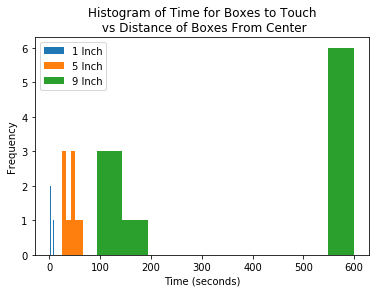

In [161]:
data1 = first_touch['1']
data5 = first_touch['5']
data9 = first_touch['9']
plt.hist(data1, label = '1 Inch')
plt.hist(data5, label = '5 Inch')
plt.hist(data9, label = '9 Inch')
plt.legend()
plt.title("Histogram of Time for Boxes to Touch\n vs Distance of Boxes From Center")
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.plot()
plt.savefig(FIGURE_DIR + 'oneHit.png')

In [162]:
print(stats.describe(data1))
print(stats.describe(data5))
print(stats.describe(data9))

DescribeResult(nobs=10, minmax=(1.0, 10.0), mean=4.0, variance=12.666666666666666, skewness=0.7949945464661502, kurtosis=-1.1117266851338874)
DescribeResult(nobs=10, minmax=(25.0, 109.0), mean=47.6, variance=591.8222222222223, skewness=1.6695983866495645, kurtosis=2.2223639379435953)
DescribeResult(nobs=10, minmax=(93.0, 600.0), mean=407.5, variance=62474.055555555555, skewness=-0.4408038185698752, kurtosis=-1.7681594373014289)


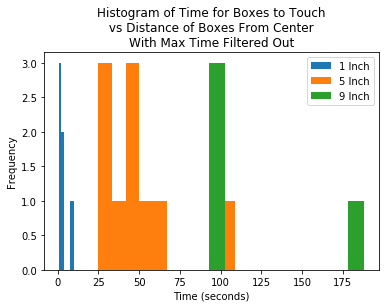

In [163]:
data1 = first_touch['1']
data5 = first_touch['5']
data9 = first_touch['9']
data9_filtered = list(filter(lambda x: x < 600, data9))
plt.hist(data1, label = '1 Inch')
plt.hist(data5, label = '5 Inch')
plt.hist(data9_filtered, label = '9 Inch')
plt.legend()
plt.title("Histogram of Time for Boxes to Touch\n vs Distance of Boxes From Center \nWith Max Time Filtered Out")
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.plot()
plt.savefig(FIGURE_DIR + 'oneHit_max_filtered.png')

In [164]:
print(stats.describe(data9))

DescribeResult(nobs=10, minmax=(93.0, 600.0), mean=407.5, variance=62474.055555555555, skewness=-0.4408038185698752, kurtosis=-1.7681594373014289)


## Flush Time

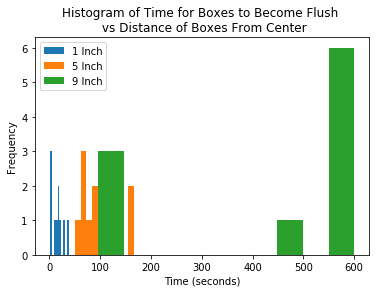

In [165]:
data1_flush = flush['1']
data5_flush = flush['5']
data9_flush = flush['9']
plt.hist(data1_flush, label = '1 Inch')
plt.hist(data5_flush, label = '5 Inch')
plt.hist(data9_flush, label = '9 Inch')
plt.legend()
plt.title("Histogram of Time for Boxes to Become Flush \n vs Distance of Boxes From Center")
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.plot()
plt.savefig(FIGURE_DIR + 'flush.png')

In [166]:
print(stats.describe(data1_flush))
print(stats.describe(data5_flush))
print(stats.describe(data9_flush))

DescribeResult(nobs=10, minmax=(1.0, 39.0), mean=15.5, variance=146.27777777777777, skewness=0.5618532624984618, kurtosis=-0.4933499829575507)
DescribeResult(nobs=10, minmax=(50.0, 166.0), mean=94.3, variance=1587.1222222222223, skewness=1.0066189876854887, kurtosis=-0.33975338364039187)
DescribeResult(nobs=10, minmax=(96.0, 600.0), mean=441.4, variance=52553.15555555556, skewness=-0.7935427810682977, kurtosis=-1.2745372389848368)


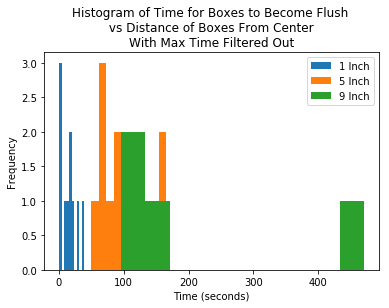

In [167]:
data1_flush = flush['1']
data5_flush = flush['5']
data9_flush = flush['9']
data9_flush_filtered = list(filter(lambda x: x < 600, data9_flush))
plt.hist(data1_flush, label = '1 Inch')
plt.hist(data5_flush, label = '5 Inch')
plt.hist(data9_flush_filtered, label = '9 Inch')
plt.legend()
plt.title("Histogram of Time for Boxes to Become Flush \n vs Distance of Boxes From Center \nWith Max Time Filtered Out")
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.plot()
plt.savefig(FIGURE_DIR + 'flush_max_filtered.png')

In [168]:
print(stats.describe(data9_flush))

DescribeResult(nobs=10, minmax=(96.0, 600.0), mean=441.4, variance=52553.15555555556, skewness=-0.7935427810682977, kurtosis=-1.2745372389848368)


## Other Statistics

### Time Difference between first contact and flush

In [169]:
time_diff_1 = data1_flush - data1
time_diff_5 = data5_flush - data5
#I use filtered because it is meaningless to use time limited data 
#I never had a case where there was a first contact then a flush
#Although there was a close calls...
time_diff_9 = list(map(operator.sub, data9_flush_filtered, data9_filtered))

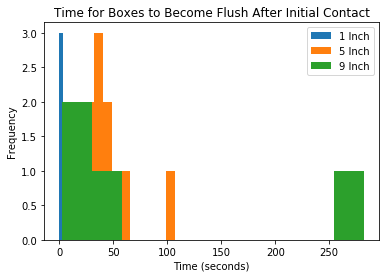

In [170]:
plt.hist(time_diff_1, label = '1 Inch')
plt.hist(time_diff_5, label = '5 Inch')
plt.hist(time_diff_9, label = '9 Inch')
plt.legend()
plt.title("Time for Boxes to Become Flush After Initial Contact")
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.plot()
plt.savefig(FIGURE_DIR + 'firstToFlush.png')

There really wasnt too much of a difference between time from going between first contact and flush for each of the group